In [1]:
!pip install git+https://github.com/imanring/BSTPP.git

  Cloning https://github.com/imanring/BSTPP.git to /tmp/pip-req-build-4bsvyi4m
  Running command git clone --filter=blob:none --quiet https://github.com/imanring/BSTPP.git /tmp/pip-req-build-4bsvyi4m
  Resolved https://github.com/imanring/BSTPP.git to commit b32ace1a87699ad54752e96b0ecf2bb84e272307
  Preparing metadata (setup.py) ... done
Using legacy 'setup.py install' for BSTPP, since package 'wheel' is not installed.
  Running setup.py install for BSTPP ... done


In [1]:
from bstpp.main import Point_Process_Model
import numpyro.distributions as dist
import numpy as np

In [2]:
import geopandas as gpd
A = gpd.read_file('data/Chicago/Boundaries - Community Areas (current).zip')

In [17]:
column_names = ['POP_DENS','VAC_HU','HH_SIZE']
model_name = 'cox_hawkes'
model = Point_Process_Model('data/Chicago/Crime_Incident_Reports/sr_2022_xyt.csv',A,model=model_name,
                            #spatial_cov='data/Chicago/spat_cov.shp',cov_names = column_names,
                            a_0=dist.Normal(1,10), alpha = dist.Beta(20,60),beta=dist.HalfNormal(2.0)
                           )

/home/imanring/PointProcess/Cox_Hawkes_Cov/bstpp/main.py:79: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  args['A_area'] = A.area.sum()/((A_[0,1]-A_[0,0])*(A_[1,1]-A_[1,0]))
/home/imanring/PointProcess/Cox_Hawkes/cox_hawkes/lib/python3.10/site-packages/geopandas/geodataframe.py:2189: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)  # noqa: B026


100%|██████████████████████████| 50000/50000 [22:20<00:00, 37.29it/s, init loss: -4498.3140, avg. loss [47501-50000]: -19192.3281]



SVI elapsed time: 1362.2565701007843


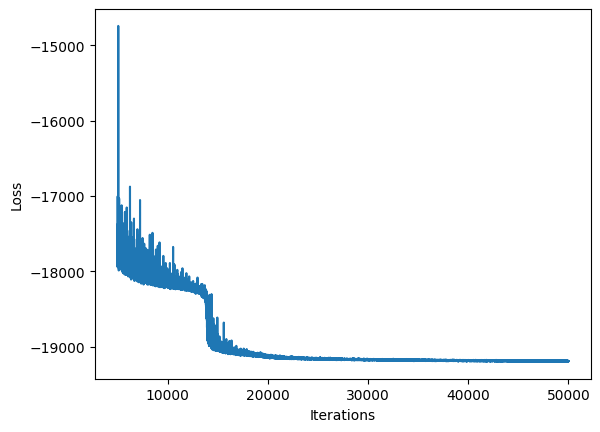

In [4]:
model.run_svi(num_steps=50000,lr=0.002)

In [ ]:
model.run_mcmc(output_file="output/Chicago_Shootings/cox_hawkes/output.pkl")

warmup:   6%|█▌                        | 91/1500 [16:25<7:03:18, 18.03s/it, 1023 steps of size 3.40e-03. acc. prob=0.75]

In [ ]:
model.plot_trigger_posterior(output_file="output/Chicago_Shootings/cox_hawkes/trig_post.png")

In [14]:
.0065*.6*110

0.429

In [ ]:
model.plot_spatial_background(output_file="output/Chicago_Shootings/cox_hawkes/f_s_post.png")

In [ ]:
model.plot_trigger_time_decay()

In [ ]:
model.plot_temporal_background(output_file="output/Chicago_Shootings/cox_hawkes/f_t_post.png")

In [10]:
model.cov_weight_post_summary()

Exception: Spatial covariates were not included in the model.

In [17]:
model_name = 'lgcp'
ss_mod = Point_Process_Model('data/Chicago/ShotSpotter/ss_2022_xyt.csv',A,model=model_name,
                            #spatial_cov='data/Chicago/spat_cov.shp',cov_names = column_names,
                            a_0=dist.Normal(0,5)
                           )

/home/imanring/PointProcess/Cox_Hawkes_Cov/bstpp/main.py:70: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  args['A_area'] = A.area.sum()/((A_[0,1]-A_[0,0])*(A_[1,1]-A_[1,0]))
/home/imanring/PointProcess/Cox_Hawkes/cox_hawkes/lib/python3.10/site-packages/geopandas/geodataframe.py:2189: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)  # noqa: B026


In [19]:
ss_mod.run_mcmc(output_file=f'output/ShotSpotter/{model_name}/output.pkl')

sample: 100%|████████████████████████████████████| 1500/1500 [02:58<00:00,  8.40it/s, 511 steps of size 6.65e-03. acc. prob=0.92]



                    mean       std    median      5.0%     95.0%     n_eff     r_hat
           a_0      7.64      0.41      7.66      6.93      8.32    344.49      1.00
         scale      2.76      0.14      2.77      2.52      2.98    266.90      1.00
  z_spatial[0]     -3.96      0.34     -3.92     -4.43     -3.41    220.28      1.00
  z_spatial[1]     -0.70      0.07     -0.69     -0.82     -0.58    514.67      1.00
  z_spatial[2]      0.06      0.10      0.06     -0.10      0.24    443.63      1.01
  z_spatial[3]      1.19      0.09      1.19      1.06      1.33    241.11      1.00
  z_spatial[4]      1.51      0.21      1.48      1.22      1.84    213.65      1.01
  z_spatial[5]      0.69      0.06      0.69      0.60      0.80    445.39      1.00
  z_spatial[6]     -0.97      0.10     -0.96     -1.12     -0.79    316.20      1.01
  z_spatial[7]      1.25      0.12      1.24      1.08      1.44    238.14      1.00
  z_spatial[8]     -1.47      0.13     -1.46     -1.65     -1.24

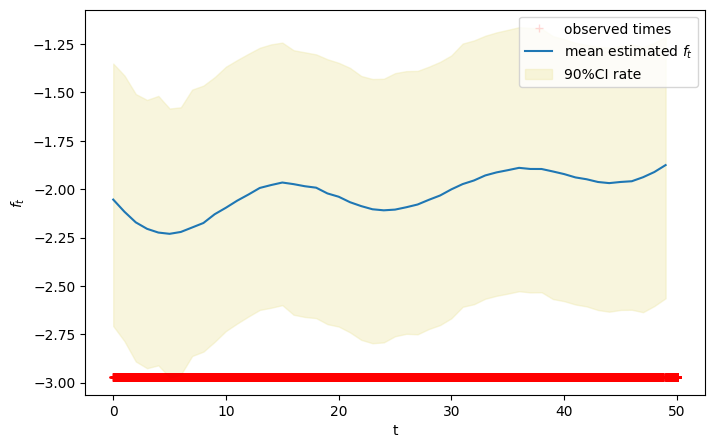

In [21]:
ss_mod.plot_temporal_background()

/home/imanring/PointProcess/Cox_Hawkes_Cov/bstpp/main.py:441: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...

  intersect = gpd.overlay(self.comp_grid, self.A, how='intersection')


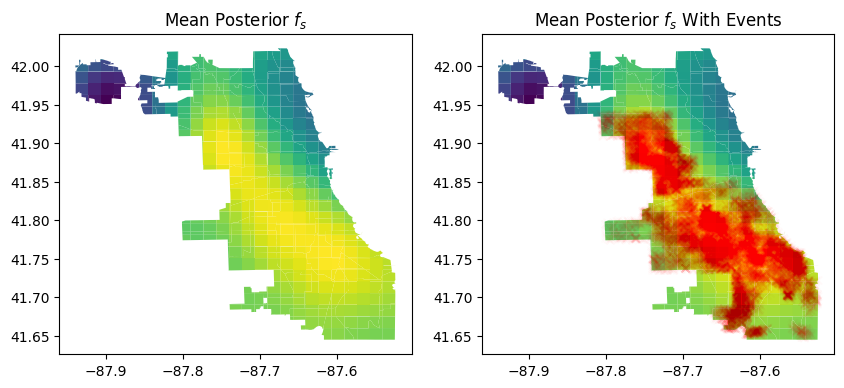

In [23]:
ss_mod.plot_spatial_background(alpha=0.01)

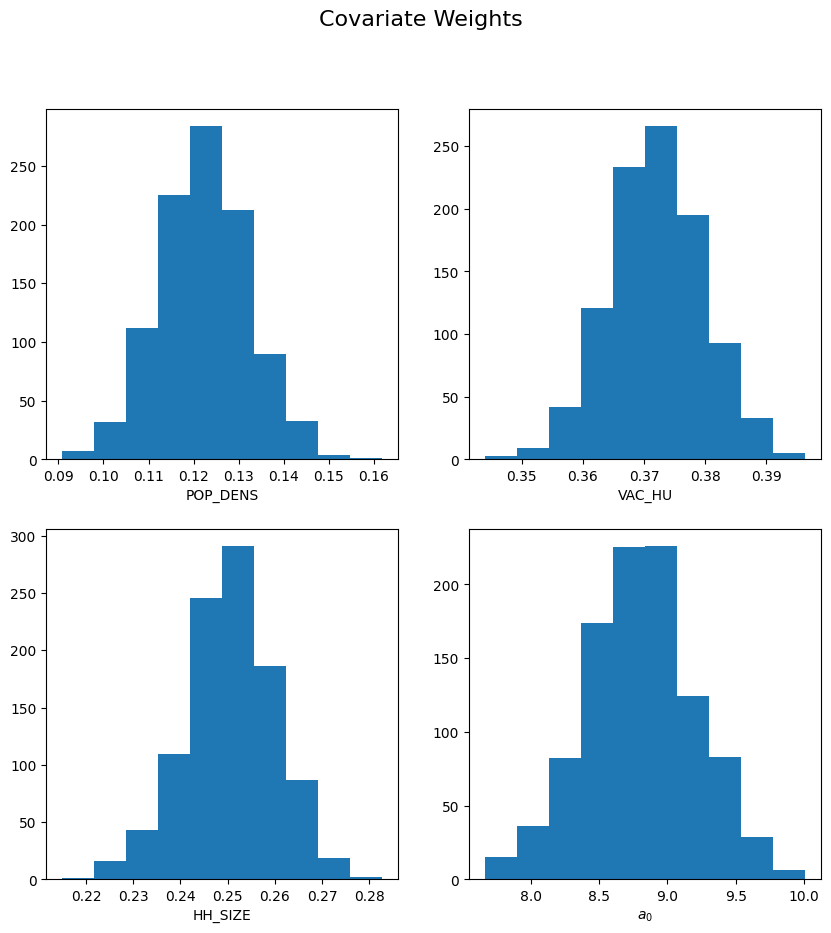

,Post Mean,Post Std,z,P>|z|,[0.025,0.975]
POP_DENS,0.122413,0.009934,12.322935,0.0,0.103596,0.141566
VAC_HU,0.372064,0.007694,48.359852,0.0,0.356889,0.386885
HH_SIZE,0.250668,0.009573,26.184711,0.0,0.230626,0.268845
a_0,8.802502,0.405239,21.721750,0.0,7.996888,9.603462


In [16]:
ss_mod.cov_weight_post_summary()

In [5]:
from bstpp.inference_functions import *
import pickle

output_dict = {}
#output_dict['model']=spatiotemporal_hawkes_model
output_dict['samples']=model.mcmc_samples
output_dict['mcmc']=model.mcmc
with open(f'output/Chicago_Shootings/{model_name}/output.pkl', 'wb') as handle:
    pickle.dump(output_dict, handle)

## Boko Haram Dataset

In [7]:
from bstpp.main import Point_Process_Model
import numpyro.distributions as dist
import numpy as np

In [8]:
A = np.array([[3,15.5],[4,16.5]])
column_names = ['droughtstart_speibase', 'urban_ih_log', 'droughtyr_speigdm',
       'herb_gc', 'capdist', 'grass_ih_log', 'nlights_sd_log', 'water_gc_log',
       'pop_gpw_sd_log', 'pasture_ih']
model_name = 'lgcp'
model = Point_Process_Model('data/spt_data.csv',A,model=model_name,
                            #spatial_cov='data/inc_spatial_cov.csv',cov_grid_size=(0.5,0.5),
                            cov_names = column_names,
                            a_0=dist.Normal(0,5)
                           )

In [9]:
import pickle
pre_run = False
if pre_run:
    with open(f'output/{model_name}/output_new.pkl', 'rb') as f:
        output = pickle.load(f)
    model.mcmc = output['mcmc']
    model.mcmc_samples = output['samples']
else:
    model.run_mcmc()

sample: 100%|███████████████████████████| 1500/1500 [00:24<00:00, 62.11it/s, 511 steps of size 1.22e-02. acc. prob=0.94]



                    mean       std    median      5.0%     95.0%     n_eff     r_hat
           a_0     -9.15      0.69     -9.16    -10.29     -8.05    315.02      1.01
  z_spatial[0]      0.55      0.10      0.55      0.39      0.73    642.40      1.00
  z_spatial[1]     -1.79      0.10     -1.79     -1.95     -1.62    664.45      1.01
  z_spatial[2]      0.08      0.08      0.08     -0.04      0.22    446.32      1.01
  z_spatial[3]      0.85      0.08      0.85      0.72      0.97    325.10      1.01
  z_spatial[4]     -1.46      0.06     -1.46     -1.56     -1.37    566.25      1.00
  z_spatial[5]      1.60      0.07      1.60      1.49      1.72    409.30      1.00
  z_spatial[6]     -0.55      0.09     -0.54     -0.69     -0.40    303.48      1.00
  z_spatial[7]      0.96      0.10      0.95      0.80      1.13    381.31      1.00
  z_spatial[8]     -1.72      0.09     -1.71     -1.85     -1.56    538.62      1.00
  z_spatial[9]      0.80      0.12      0.80      0.60      0.99

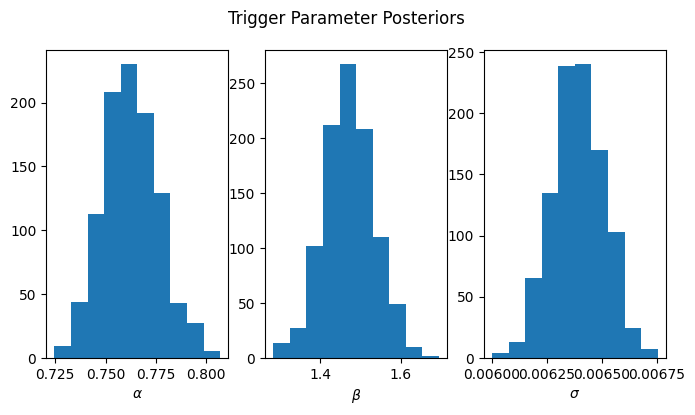

,Post Mean,Post Std,z,P>|z|,[0.025,0.975]
alpha,0.762644,0.013651,55.865711,0.0,0.737082,0.791501
beta,1.472359,0.062118,23.702444,0.0,1.351334,1.594751
sigma,0.006395,0.000116,55.044037,0.0,0.006175,0.006613


In [16]:
model.plot_trigger_posterior()

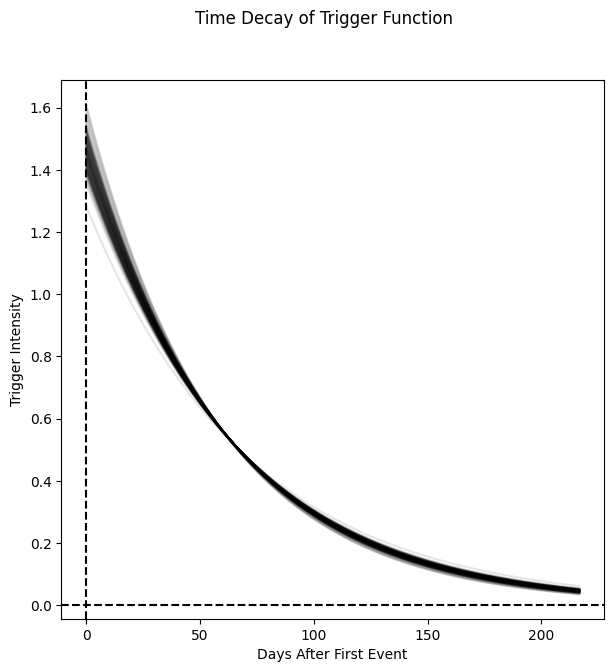

Mean trigger time: 62.13 days


In [10]:
model.plot_trigger_time_decay()

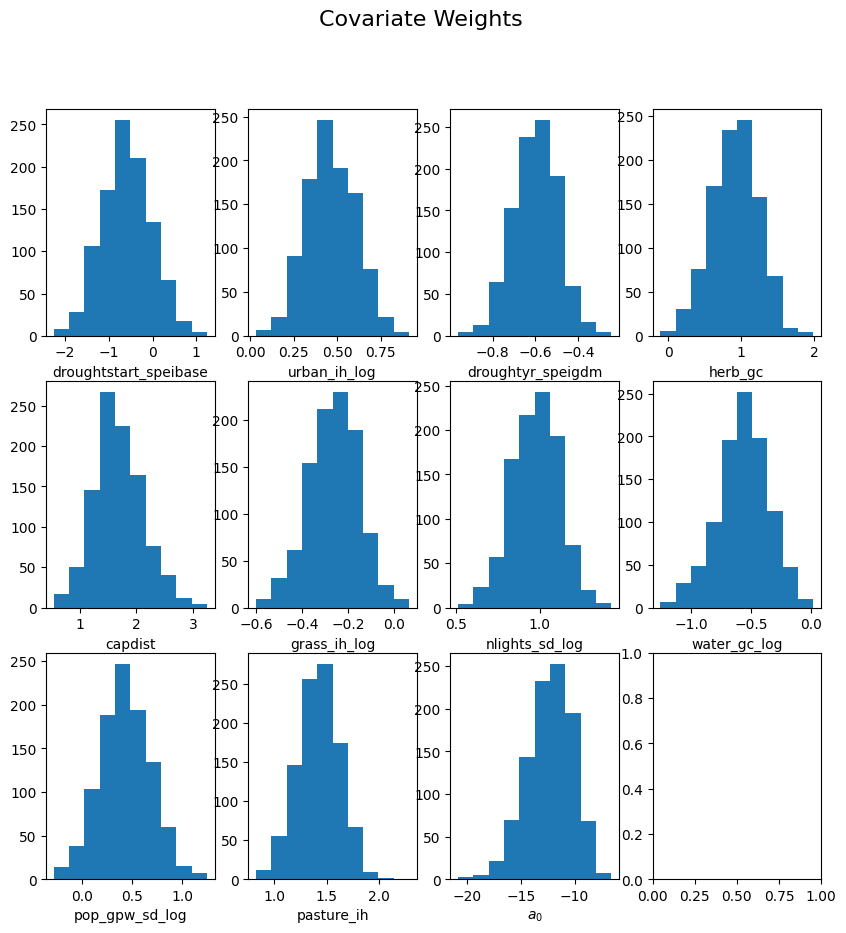

,Post Mean,Post Std,z,P>|z|,[0.025,0.975]
droughtstart_speibase,-0.592510,0.561177,-1.055834,2.910442e-01,-1.621145,0.527160
urban_ih_log,0.463592,0.140270,3.304999,9.497683e-04,0.189162,0.731607
droughtyr_speigdm,-0.599132,0.104945,-5.709002,1.136403e-08,-0.808043,-0.397687
herb_gc,0.912558,0.318840,2.862122,4.208144e-03,0.266848,1.493831
capdist,1.685969,0.428178,3.937540,8.232122e-05,0.911767,2.611901
grass_ih_log,-0.261593,0.110969,-2.357354,1.840567e-02,-0.497104,-0.051082
nlights_sd_log,0.979912,0.141180,6.940886,3.896439e-12,0.692393,1.246885
water_gc_log,-0.567685,0.214425,-2.647469,8.109689e-03,-1.041001,-0.177865
pop_gpw_sd_log,0.431656,0.252891,1.706885,8.784337e-02,-0.059419,0.920902
pasture_ih,1.421353,0.198158,7.172842,7.345236e-13,1.034838,1.798220


In [11]:
model.cov_weight_post_summary()#plot_file=f'output/{model_name}/cov_post_hist.png',
                              #summary_file=f'output/{model_name}/cov_par_summary.csv')

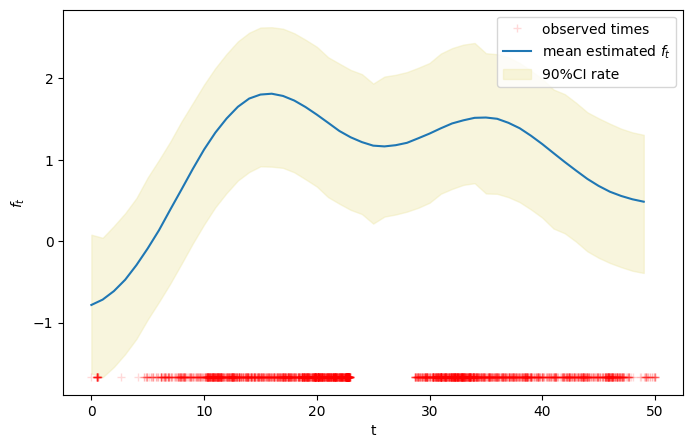

In [10]:
model.plot_temporal_background()#f'output/{model_name}/temporal_gp_post_mean.png')

/home/imanring/PointProcess/Cox_Hawkes_Cov/bstpp/main.py:527: UserWarning: `keep_geom_type=True` in overlay resulted in 4430 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  intersect = gpd.overlay(self.comp_grid, self.A[['geometry']], how='intersection')


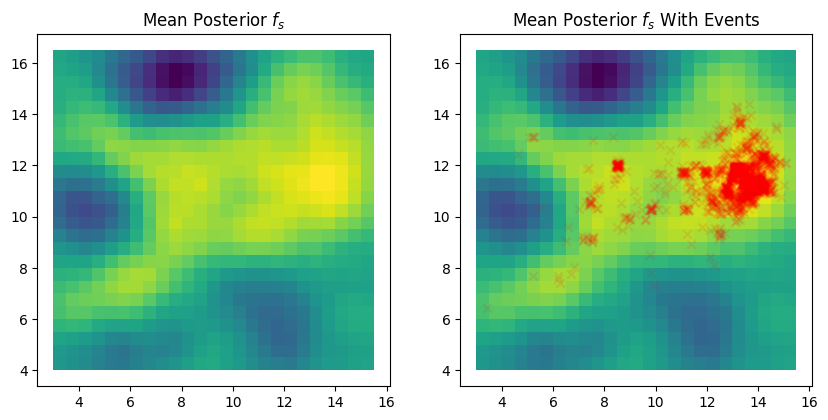

In [11]:
model.plot_spatial_background(include_cov=False)#f'output/{model_name}/spatial_gp_cov_post_mean.png',include_cov=True)

# Test on Simulation

In [16]:
from bstpp.main import Point_Process_Model
import numpyro.distributions as dist
import numpy as np